In [71]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as scipy
import matplotlib.pyplot as plt
from datetime import datetime
import time
%matplotlib inline

In [72]:
df = pd.read_csv("C:\\Users\\Peter\\Desktop\\Thinkful\\Marathon Results\\marathon_results_2016.csv", low_memory = False)

In [73]:
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [74]:
df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 8', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')

In [75]:
df.shape

(26630, 24)

In [76]:
df.isnull().values.any()  #check for missing data

True

In [77]:
print(100 * df.isnull().sum()/len(df))#identify columns in data that are null

Bib               0.000000
Name              0.000000
Age               0.000000
M/F               0.000000
City              0.003755
State            10.690950
Country           0.000000
Citizen          95.786707
Unnamed: 8       99.688321
5K                0.000000
10K               0.000000
15K               0.000000
20K               0.000000
Half              0.000000
25K               0.000000
30K               0.000000
35K               0.000000
40K               0.000000
Pace              0.000000
Proj Time         0.000000
Official Time     0.000000
Overall           0.000000
Gender            0.000000
Division          0.000000
dtype: float64


In [78]:
for index, row in df.iterrows():
    time = row['25K']
    if (time != '-'):
        racetime = datetime.strptime(time, "%H:%M:%S").timetuple()
        raceinseconds = racetime.tm_hour*60*60 + racetime.tm_min*60 + racetime.tm_sec
        df.loc[index, '25Ktimeinsec']=raceinseconds

In [79]:
for index, row in df.iterrows():
    time = row['30K']
    if (time != '-'):
        racetime = datetime.strptime(time, "%H:%M:%S").timetuple()
        raceinseconds = racetime.tm_hour*60*60 + racetime.tm_min*60 + racetime.tm_sec
        df.loc[index, '30Ktimeinsec']=raceinseconds

In [80]:
for index, row in df.iterrows():
    time = row['40K']
    if (time != '-'):
        racetime = datetime.strptime(time, "%H:%M:%S").timetuple()
        raceinseconds = racetime.tm_hour*60*60 + racetime.tm_min*60 + racetime.tm_sec
        df.loc[index, '40Ktimeinsec']=raceinseconds

In [81]:
infoinseconds = df.filter(['M/F', '25K', '25Ktimeinsec', '30K','30Ktimeinsec', '40K','40Ktimeinsec'])

In [82]:
infoinseconds = infoinseconds.dropna() 

In [83]:
infoinseconds.head()

,M/F,25K,25Ktimeinsec,30K,30Ktimeinsec,40K,40Ktimeinsec
0,M,1:19:15,4755.0,1:34:17,5657.0,2:05:59,7559.0
1,M,1:19:15,4755.0,1:34:17,5657.0,2:05:59,7559.0
2,M,1:19:15,4755.0,1:34:45,5685.0,2:06:47,7607.0
3,M,1:19:16,4756.0,1:34:45,5685.0,2:06:47,7607.0
4,M,1:19:18,4758.0,1:34:46,5686.0,2:08:11,7691.0


In [84]:
print(100 * infoinseconds.isnull().sum()/len(infoinseconds))#identify columns in data that are null

M/F             0.0
25K             0.0
25Ktimeinsec    0.0
30K             0.0
30Ktimeinsec    0.0
40K             0.0
40Ktimeinsec    0.0
dtype: float64


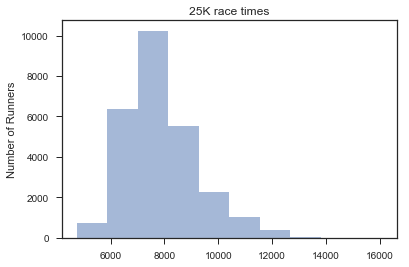

In [85]:
plt.hist(infoinseconds['25Ktimeinsec'], label = '25k times', alpha = 0.5, bins = 10)
plt.ylabel('Number of Runners')
plt.title('25K race times')
sns.set(style="ticks")

plt.show()

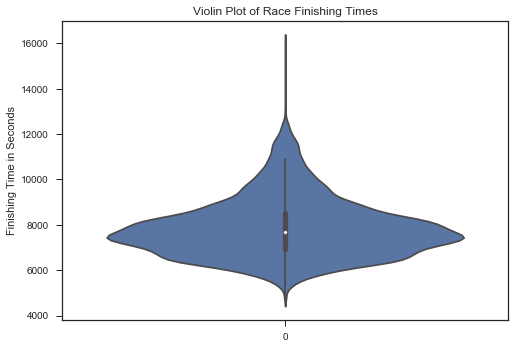

In [86]:
sns.violinplot(data=infoinseconds['25Ktimeinsec'])
plt.ylabel('Finishing Time in Seconds')
plt.title('Violin Plot of Race Finishing Times')
plt.show()

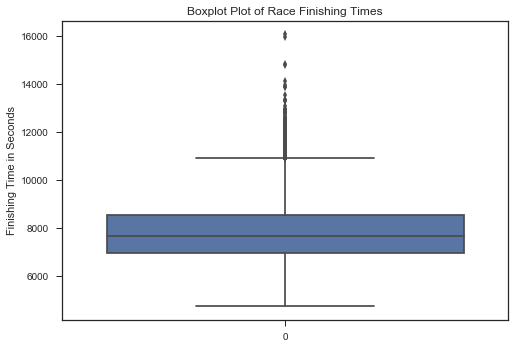

In [87]:
sns.boxplot(data=infoinseconds['25Ktimeinsec'])
plt.ylabel('Finishing Time in Seconds')
plt.title('Boxplot Plot of Race Finishing Times')
plt.show()

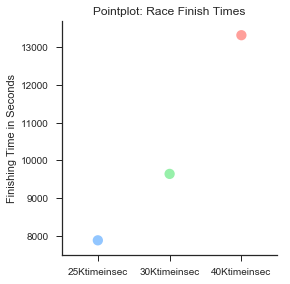

In [88]:
sns.factorplot(data=infoinseconds, kind="point", palette="pastel")
plt.ylabel("Finishing Time in Seconds")
sns.plt.title('Pointplot: Race Finish Times')
plt.show()

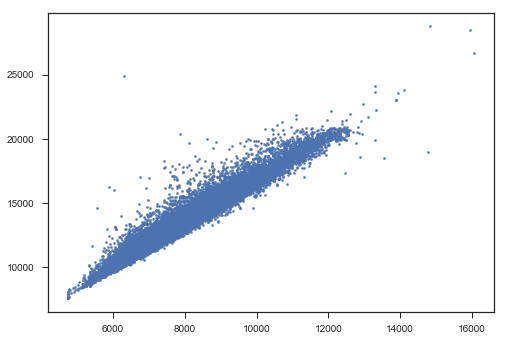

In [89]:
plt.scatter(data = infoinseconds, x='25Ktimeinsec', y='40Ktimeinsec', s=5)
plt.show()

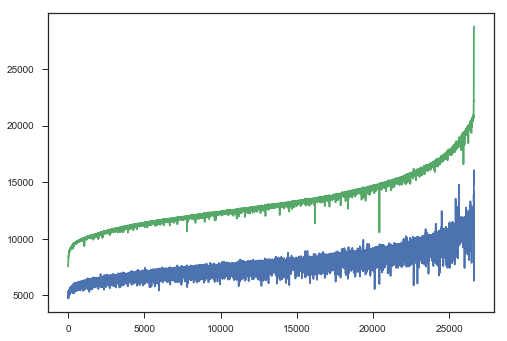

In [90]:
plt.plot(infoinseconds['25Ktimeinsec'])
plt.plot(infoinseconds['40Ktimeinsec'])
plt.show()

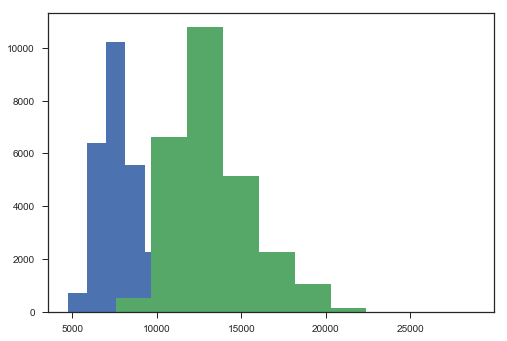

In [91]:
plt.hist(infoinseconds['25Ktimeinsec'])
plt.hist(infoinseconds['40Ktimeinsec'])
plt.show()

In [108]:
mens=pd.DataFrame()
for index, rows in infoinseconds.iterrows():
    if row['M/F']=='M':
        mens.loc[index, '25Ktimeinsec'] = row[index, '25Ktimeinsec']

In [111]:
mens = infoinseconds.loc[infoinseconds['M/F'] == 'M']
womens = infoinseconds.loc[infoinseconds['M/F'] == 'F']

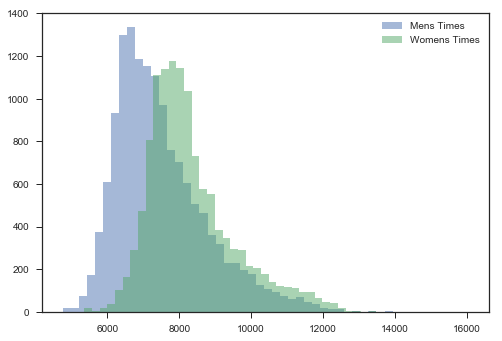

In [126]:
bincount = 50
plt.hist(mens['25Ktimeinsec'], label = 'Mens Times', alpha = 0.5, bins = bincount)
plt.hist(womens['25Ktimeinsec'], label = 'Womens Times', alpha = 0.5, bins = bincount)
plt.legend(loc='upper right')
plt.show()

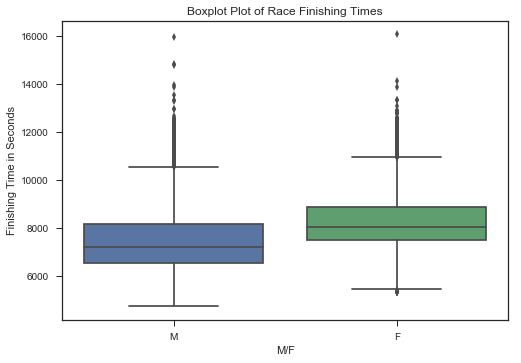

In [128]:
sns.boxplot(data=infoinseconds, x='M/F', y='25Ktimeinsec')
plt.ylabel('Finishing Time in Seconds')
plt.title('Boxplot Plot of Race Finishing Times')
plt.show()

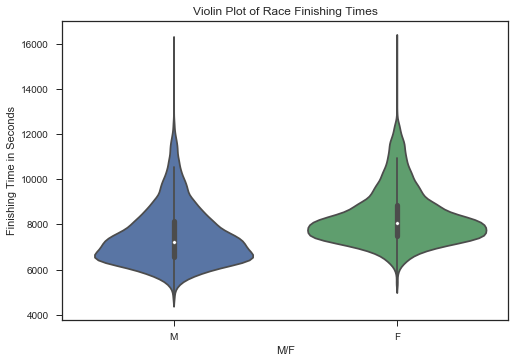

In [129]:
sns.violinplot(data=infoinseconds, x='M/F', y='25Ktimeinsec')
plt.ylabel('Finishing Time in Seconds')
plt.title('Violin Plot of Race Finishing Times')
plt.show()

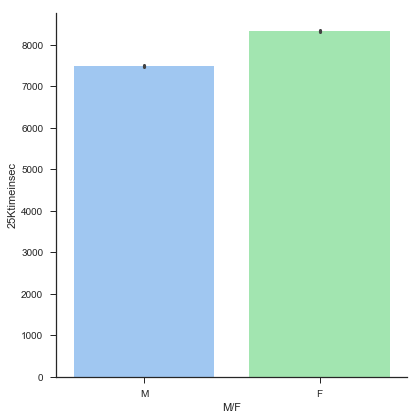

In [133]:
sns.factorplot(x="M/F", y="25Ktimeinsec", data=infoinseconds,
                   size=6, kind="bar", palette="pastel")
plt.show()

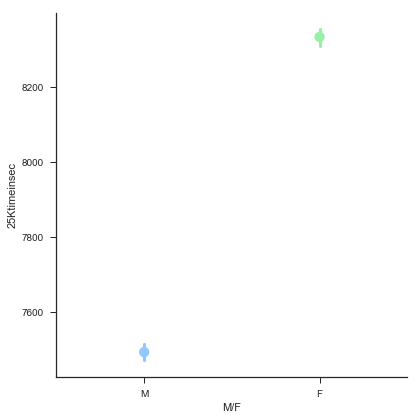

In [134]:
sns.factorplot(x="M/F", y="25Ktimeinsec", data=infoinseconds,
                   size=6, kind="point", palette="pastel")
plt.show()